In [18]:
import torch
from torch.utils.data import DataLoader
from argparse import ArgumentParser
from mingpt.model import GPT
from datasets import MaxNDataset, ColorPermutation
from mingpt.utils import sample_while

# parser = add_train_args(ArgumentParser())
parser = MaxNDataset.add_data_specific_args(ArgumentParser())
parser = GPT.add_model_specific_args(parser)
FLAGS, unknown = parser.parse_known_args()
# FLAGS = train.FLAGS
FLAGS.n_embd=256
FLAGS.n_layer=11
FLAGS.n_head=8
# model = train.m

# chkp = torch.load('runs/Nov29_18-45-51_i1/model_ep1_step146.pt', map_location='cpu')
chkp = torch.load('runs/Nov29_18-57-42_i1/model_ep1_step146.pt', map_location='cpu')
m = GPT(FLAGS)
m.to('cpu')
m.load_state_dict(chkp['model_state_dict'])

train_trans = [ColorPermutation(max_colors=FLAGS.n_colors, limit=1000)]
test_trans = None
val_trans = [ColorPermutation(max_colors=FLAGS.n_colors, limit=100)]
ds = MaxNDataset(transforms=[train_trans, test_trans, val_trans], config=FLAGS)
train, test, val = ds.datasets
dl = DataLoader(test, batch_size=1, num_workers=1, shuffle=False)

In [19]:
res = sample_while(m ,dl)

100%|██████████| 930/930 [05:26<00:00,  2.85it/s]


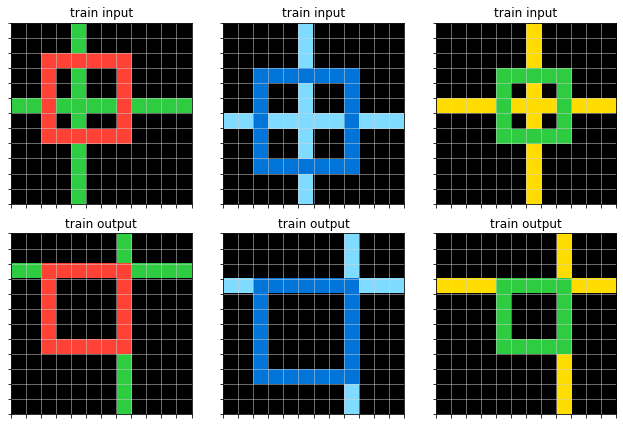

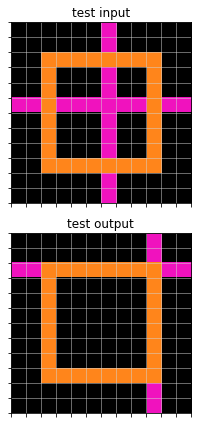

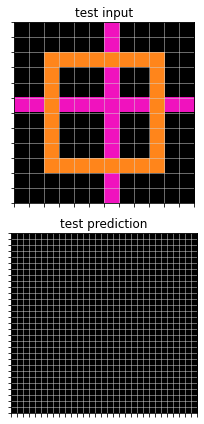

In [20]:
test.dataset.plot(1, predictions=[res[0]])